In [1]:
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.spatial import distance

from utils import *

In [2]:
from optimization.range.MethodSven import method_sven_iterations_list
from optimization.range.MethodSven import method_sven

from optimization.range.SearchDichotomous import search_method_dichotomous_iterations_list
from optimization.range.SearchDichotomous import search_dichotomous

from optimization.range.HalvingMethod import halving_method
from optimization.range.HalvingMethod import halving_method_iterations_list

from optimization.range.SearchGoldenSection import search_golden_section
from optimization.range.SearchGoldenSection import search_golden_section_iterations_list

from optimization.range.SearchPitchAdaptation import search_pitch_adaptation
from optimization.range.SearchPitchAdaptation import search_pitch_adaptation_iterations_list
from optimization.range.SearchPitchAdaptation import search_pitch_adaptation_iterations_label

from interpolition.ThreePointQuadratic import threePointQuadratic
from interpolition.ThreePointQuadratic import threePointQuadratic_list
from interpolition.ThreePointQuadratic import threePointQuadratic_label

from interpolition.CubicInterpolation import cubicInterpolation
from interpolition.CubicInterpolation import threePointQuadratic_list
from interpolition.CubicInterpolation import threePointQuadratic_label

from optimization.n_dimensional.CoordinateDescent import get_coordinate_descent
from optimization.n_dimensional.CoordinateDescent import coordinate_descent_iter_list

from optimization.n_dimensional.MethodOfSteepestDescent import get_method_of_steepest_descent
from optimization.n_dimensional.MethodOfSteepestDescent import method_of_steepest_descent_iter_list

In [3]:
x0 = 3.0
h = 2.0
n = 200

count_invoke = 0
f = lambda x: 20 * (x + 5).__pow__(2)
f_arr = lambda X: np.transpose([X, f(X)])

columns = ['x', 'y', 'h']
epsilon = 0.02
iter = 500

In [4]:
def f(X):
    return (X[0] - 1) ** 2 + (X[1] - 1) ** 2


nd_start_point = np.array([-15.0, -15.0])
nd_epsilon = 0.1
nd_iter = 200


def derivative(X):
    return optimize.approx_fprime(X, f, epsilon)

array([-1.98, -1.98])

In [5]:
def draw_3d_function(f, steps, width, height):
    X, Y = np.meshgrid(np.linspace(-width, width, 30), np.linspace(-height, height, 30))

    fig = plt.figure(figsize=(16, 10))
    ax = fig.gca(projection='3d')

    zs = np.array([f(np.array([x, y])) for x, y in zip(np.ravel(Y), np.ravel(X))])
    Z = zs.reshape(X.shape)

    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)
    ax.plot(xs=steps[0], ys=steps[1], zs=steps[2],
            marker='*', markersize=20, zorder=3,
            markerfacecolor='y', lw=3, c='black')
    return ax


def add_sven_to_optimisation(optimization_algoritm):
    def optimization(f, x):
        range = method_sven(0, h, f, n)
        result = search_dichotomous(f, min(range), max(range), epsilon=epsilon, iter=iter)
        return result[0]

    return optimization

<ipython-input-6-7604b8774b29>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 0]),
<ipython-input-6-7604b8774b29>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 1]),
<ipython-input-6-7604b8774b29>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

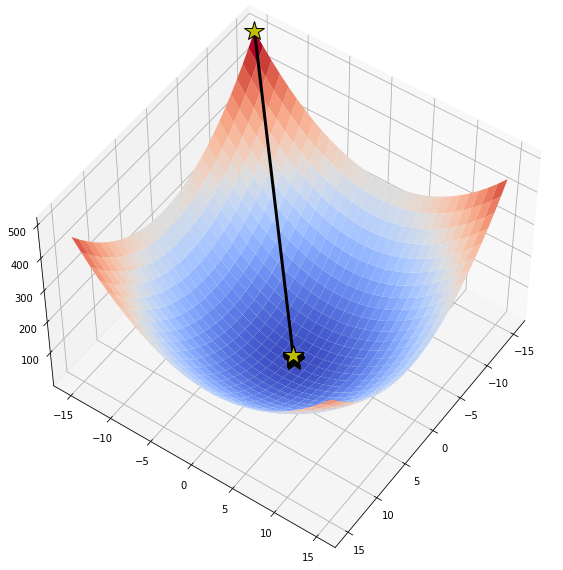

array([0.48593988, 0.48593988])

In [6]:

from utils.utils import to_nd_array

opt_fun = get_method_of_steepest_descent(add_sven_to_optimisation(search_dichotomous))
res = opt_fun(f, derivative, nd_start_point, epsilon, nd_iter)

steps = [
    np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 0]),
    np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 1]),
    np.array(np.array(method_of_steepest_descent_iter_list)[:, 1])
]

ax = draw_3d_function(f, np.array(steps), 15, 15)

ax.view_init(50, 35)
plt.show()
# np.transpose(np.array(steps))
res

In [8]:
np.array(method_of_steepest_descent_iter_list)

<ipython-input-8-ede0f385c982>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(method_of_steepest_descent_iter_list)


array([[array([-15., -15.]), 512.0, 0],
       [array([0.99969274, 0.99969274]), 1.8881521112734252e-07,
        22.626982469246503],
       [array([0.98016516, 0.98016516]), 0.0007868417039512887,
        0.027616170090938644],
       [array([0.96063769, 0.96063769]), 0.003098783237253898,
        0.02761601688989944],
       [array([0.94114003, 0.94114003]), 0.0069289924810441205,
        0.02757385421877347],
       [array([0.92170137, 0.92170137]), 0.01226135100842634,
        0.02749041493899993],
       [array([0.90234982, 0.90234982]), 0.019071113843204212,
        0.027367218758853253],
       [array([0.88311193, 0.88311193]), 0.027325642104359085,
        0.027206491123372624],
       [array([0.86401223, 0.86401223]), 0.03698534487431621,
        0.02701104791471212],
       [array([0.84507297, 0.84507297]), 0.048004766270173124,
        0.0267841575471909],
       [array([0.82631386, 0.82631386]), 0.06033374978376524,
        0.026529393209675716],
       [array([0.80775196, 

<ipython-input-7-d4f8d38f0ec4>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(to_nd_array(np.array(coordinate_descent_iter_list)[:, 0])[:, 0]),
<ipython-input-7-d4f8d38f0ec4>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(to_nd_array(np.array(coordinate_descent_iter_list)[:, 0])[:, 1]),
<ipython-input-7-d4f8d38f0ec4>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you m

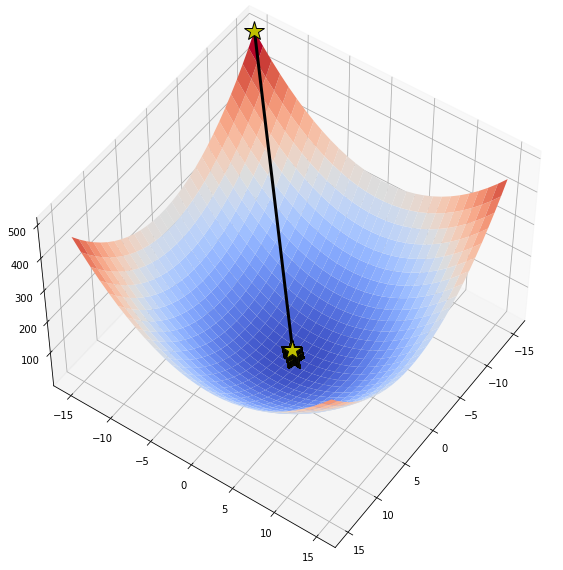

array([[-15.0, -15.0, 512.0],
       [0.990361095610119, 0.990361095610119, 0.0001858169556745352],
       [0.970829845610119, 0.970829845610119, 0.00170179581425899],
       [0.951298595610119, 0.951298595610119, 0.004743653579093445],
       [0.931767345610119, 0.931767345610119, 0.009311390250177898],
       [0.912236095610119, 0.912236095610119, 0.015405005827512353],
       [0.892704845610119, 0.892704845610119, 0.023024500311096808],
       [0.873173595610119, 0.873173595610119, 0.032169873700931266],
       [0.853642345610119, 0.853642345610119, 0.04284112599701572],
       [0.834111095610119, 0.834111095610119, 0.055038257199350175],
       [0.814579845610119, 0.814579845610119, 0.06876126730793462],
       [0.795048595610119, 0.795048595610119, 0.08401015632276908],
       [0.775517345610119, 0.775517345610119, 0.10078492424385353],
       [0.755986095610119, 0.755986095610119, 0.11908557107118799],
       [0.736454845610119, 0.736454845610119, 0.13891209680477246],
       [0.

In [7]:

from utils.utils import to_nd_array

opt_fun = get_coordinate_descent(add_sven_to_optimisation(search_dichotomous))
res = opt_fun(f, nd_start_point, epsilon, nd_iter)

steps = [
    np.array(to_nd_array(np.array(coordinate_descent_iter_list)[:, 0])[:, 0]),
    np.array(to_nd_array(np.array(coordinate_descent_iter_list)[:, 0])[:, 1]),
    np.array(np.array(coordinate_descent_iter_list)[:, 1])
]

ax = draw_3d_function(f, np.array(steps), 15, 15)

ax.view_init(50, 35)
plt.show()
np.transpose(np.array(steps))

In [26]:
def example_get_coordinate_descent(optimization_fum):
    opt_fun = get_coordinate_descent(add_sven_to_optimisation(optimization_fum))
    res = opt_fun(f, nd_start_point, epsilon, nd_iter)

    steps = [
        np.array(to_nd_array(np.array(coordinate_descent_iter_list)[:, 0])[:, 0]),
        np.array(to_nd_array(np.array(coordinate_descent_iter_list)[:, 0])[:, 1]),
        np.array(np.array(coordinate_descent_iter_list)[:, 1]),
        np.array(np.array(coordinate_descent_iter_list)[:, 2]),
    ]

    ax = draw_3d_function(f, np.array(steps), 15, 15)

    ax.view_init(50, 35)
    plt.show()
    return np.transpose(np.array(steps))

In [27]:
example_get_coordinate_descent(search_dichotomous)

IndexError: index 2 is out of bounds for axis 1 with size 2

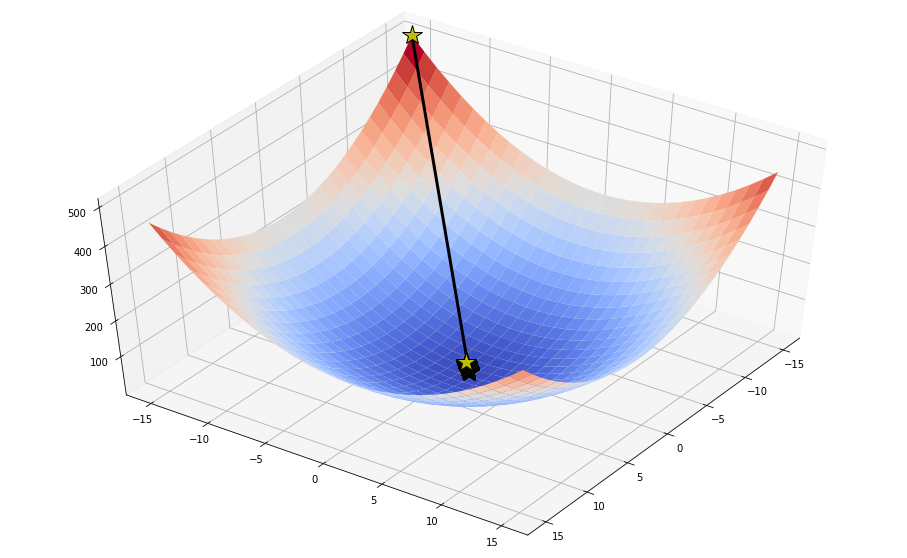

array([[-15.0, -15.0, 512.0],
       [0.9951790945870536, 0.9951790945870536, 4.6482258001152594e-05],
       [0.9854123070126488, 0.9854123070126488, 0.00042560157338643],
       [0.9756455194382441, 0.9756455194382441, 0.001186281446865895],
       [0.9658787318638393, 0.9658787318638393, 0.0023285218784395477],
       [0.9561119442894346, 0.9561119442894346, 0.003852322868107388],
       [0.9463451567150298, 0.9463451567150298, 0.005757684415869416],
       [0.9365783691406251, 0.9365783691406251, 0.008044606521725632],
       [0.9268115815662203, 0.9268115815662203, 0.010713089185676036],
       [0.9170447939918156, 0.9170447939918156, 0.013763132407720627],
       [0.9072780064174109, 0.9072780064174109, 0.017194736187859407],
       [0.8975112188430061, 0.8975112188430061, 0.02100790052609237],
       [0.8877444312686014, 0.8877444312686014, 0.025202625422419526],
       [0.8779776436941966, 0.8779776436941966, 0.02977891087684087],
       [0.8682108561197919, 0.8682108561197919,

In [12]:
example_get_coordinate_descent(cubicInterpolation)